In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv('ChargePoint Data CY20Q4.csv', dtype={'Station Name': str}, parse_dates=['End Date', 'Start Date'], low_memory=False)
df = df.drop(["Org Name", "Country", "Start Time Zone", "End Time Zone"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Station Name                     259415 non-null  object        
 1   MAC Address                      259415 non-null  object        
 2   Start Date                       259415 non-null  datetime64[ns]
 3   End Date                         259415 non-null  object        
 4   Transaction Date (Pacific Time)  259206 non-null  object        
 5   Total Duration (hh:mm:ss)        259415 non-null  object        
 6   Charging Time (hh:mm:ss)         259415 non-null  object        
 7   Energy (kWh)                     259415 non-null  float64       
 8   GHG Savings (kg)                 259415 non-null  float64       
 9   Gasoline Savings (gallons)       259415 non-null  float64       
 10  Port Type                        259406 non-

In [4]:
df.head(5)

,Station Name,MAC Address,Start Date,End Date,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Type,Port Number,Plug Type,EVSE ID,Address 1,City,State/Province,Postal Code,Latitude,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-29 20:17:00,7/29/2011 23:20,7/29/2011 23:20,3:03:32,1:54:03,6.249457,2.625,0.784,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,37.444572,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-30 00:00:00,7/30/2011 0:02,7/30/2011 0:02,0:02:06,0:01:54,0.106588,0.045,0.013,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,37.444572,-122.160309,USD,0.0,Customer,4,94301.0,4169,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-30 08:16:00,7/30/2011 12:34,7/30/2011 12:34,4:17:32,4:17:28,14.951777,6.280,1.876,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,37.444572,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-30 14:51:00,7/30/2011 16:55,7/30/2011 16:55,2:03:24,2:02:58,7.159643,3.007,0.899,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,37.444572,-122.160309,USD,0.0,Customer,6,94302.0,2545,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,2011-07-30 18:51:00,7/30/2011 20:03,7/30/2011 20:03,1:11:24,0:43:54,1.957765,0.822,0.246,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,37.444572,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765,NaN,NaN,NaN


In [5]:
def create_hub_name(station):
   hub_name = station.rsplit('/', 1)[1].lstrip().rsplit(' ', 1)[0]
   if hub_name == 'BRYANT #':
      return 'BRYANT'
   else: 
      return hub_name

def count_plugs(station, station_list, no_plug_list):
   no_plugs = len(df['Port Number'].loc[df['Station Name'] == station].unique())
   return no_plugs
   '''if 'SHERMAN' in station:
      return 2
   else: 
      return no_plugs'''

In [6]:
## Add hub colu,n
df['Hub'] = df['Station Name'].apply(create_hub_name)

In [7]:
port_num = []
station_name = []
j = 0
for i in df['Station Name'].unique():
    station_name.append(i)
    df_port_num = df['Port Number'].loc[df['Station Name'] == i].unique()
    port_num.append(int(len(df_port_num)))

plug_per_station = dict(zip(station_name, port_num))


In [8]:
## Poulate variable no. of plugs with plugs pr. unique station
df['No. Plugs'] = np.zeros(len(df))
for key, value in plug_per_station.items():
    df.loc[df['Station Name'] == key, ['No. Plugs']] = value

<AxesSubplot:title={'center':'Total plugin events pr. hub'}, xlabel='Hub'>

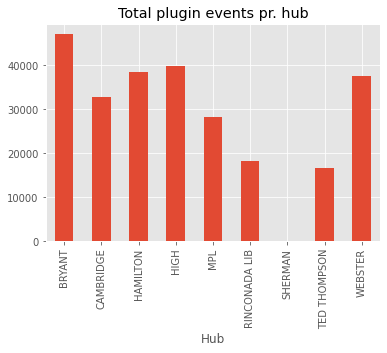

In [9]:
df.groupby('Hub')['Plug In Event Id'].count().plot.bar(title = 'Total plugin events pr. hub')

<AxesSubplot:title={'center':'Total plugs per station'}, xlabel='Station Name'>

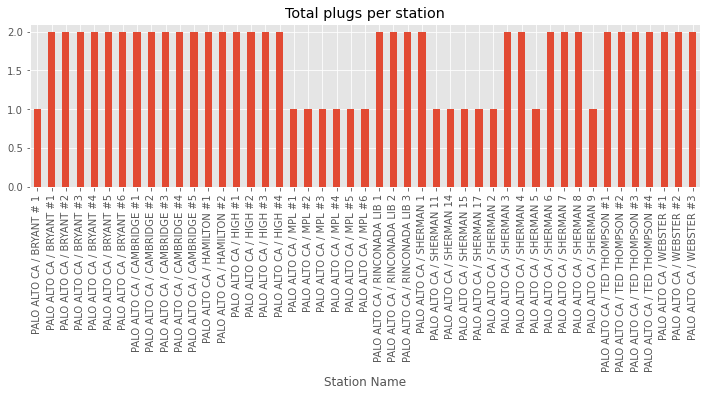

In [10]:
df.groupby('Station Name')['No. Plugs'].first().plot.bar(title = 'Total plugs per station', figsize=(12, 3))

In [11]:
## Find first time a specific plug at a specific station is in use
list_of_first_records = []
for i in df['Station Name'].unique():
    list_of_first_records.append(df[df['Station Name'] == i].iloc[0].values)
df_charging_stations = pd.DataFrame(list_of_first_records)
df_charging_stations = df_charging_stations.set_axis(df.columns.unique().values, axis=1, inplace=False)

In [13]:
## Count no. of charging stations pr. hub over time
df_charging_stations['No. Stations'] = df_charging_stations.groupby('Hub').cumcount()
df_charging_stations['No. Stations'] = df_charging_stations['No. Stations'] + 1
df_charging_stations['No. Plugs per Hub'] = df_charging_stations.groupby('Hub').cumsum()['No. Plugs']
df_charging_stations_per_hub = df_charging_stations[['Station Name', 'Start Date', 'Port Number', 'Hub', 'No. Stations', 'No. Plugs per Hub']]

In [14]:
## Create df with time and hubs as rows and columns respectively. Filled with number of charging stations
df_hub = df_charging_stations_per_hub.pivot_table(values='No. Stations', index=['Start Date'], columns='Hub', aggfunc='first')
df_hub = df_hub.fillna(0)
df_hub = df_hub.replace(to_replace=0, method='ffill')

In [15]:
df_plug_hub = df_charging_stations_per_hub.pivot_table(values='No. Plugs per Hub', index=['Start Date'], columns='Hub', aggfunc='first')
df_plug_hub = df_plug_hub.fillna(0)
df_plug_hub = df_plug_hub.replace(to_replace=0, method='ffill')

<AxesSubplot:title={'center':'No. of plugs pr. hub ($\\tau$)'}, xlabel='Start Date'>

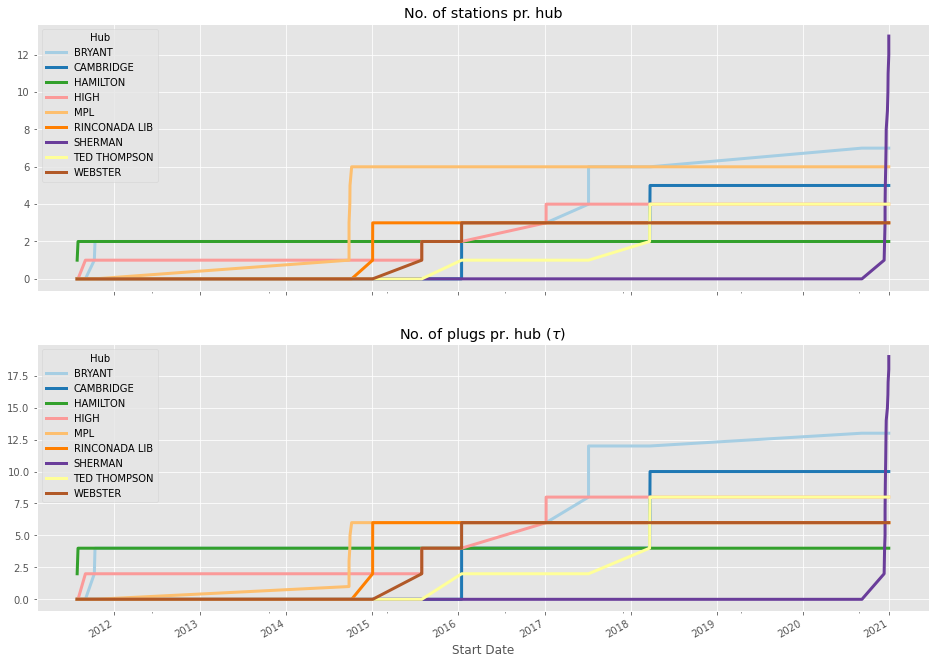

In [20]:
fig, axes = plt.subplots(2, figsize=(16,12), sharex=True)
df_hub.plot(colormap = 'Paired', linewidth = 3, title = 'No. of stations pr. hub', ax=axes[0])
df_plug_hub.plot(colormap = 'Paired', linewidth = 3, title = r'No. of plugs pr. hub ($\tau$)', ax=axes[1])

## Exploring distributions from when the models begin recording

In [39]:
## Read count data format
df_event = pd.read_csv('charging_session_count_30.csv', index_col=0, parse_dates=['Period'])

In [72]:
## Getting first record of each station 
first_date_rec = []
j = 0

for i in df_charging_stations['Hub'].unique():
    first_recording = df_charging_stations['Start Date'].loc[df_charging_stations['Hub'] == i].iloc[0]
    first_date_rec.append(first_recording)
    

station_name = df_event['Cluster'].unique()
hub_start_dict = dict(zip(station_name, first_date_rec))


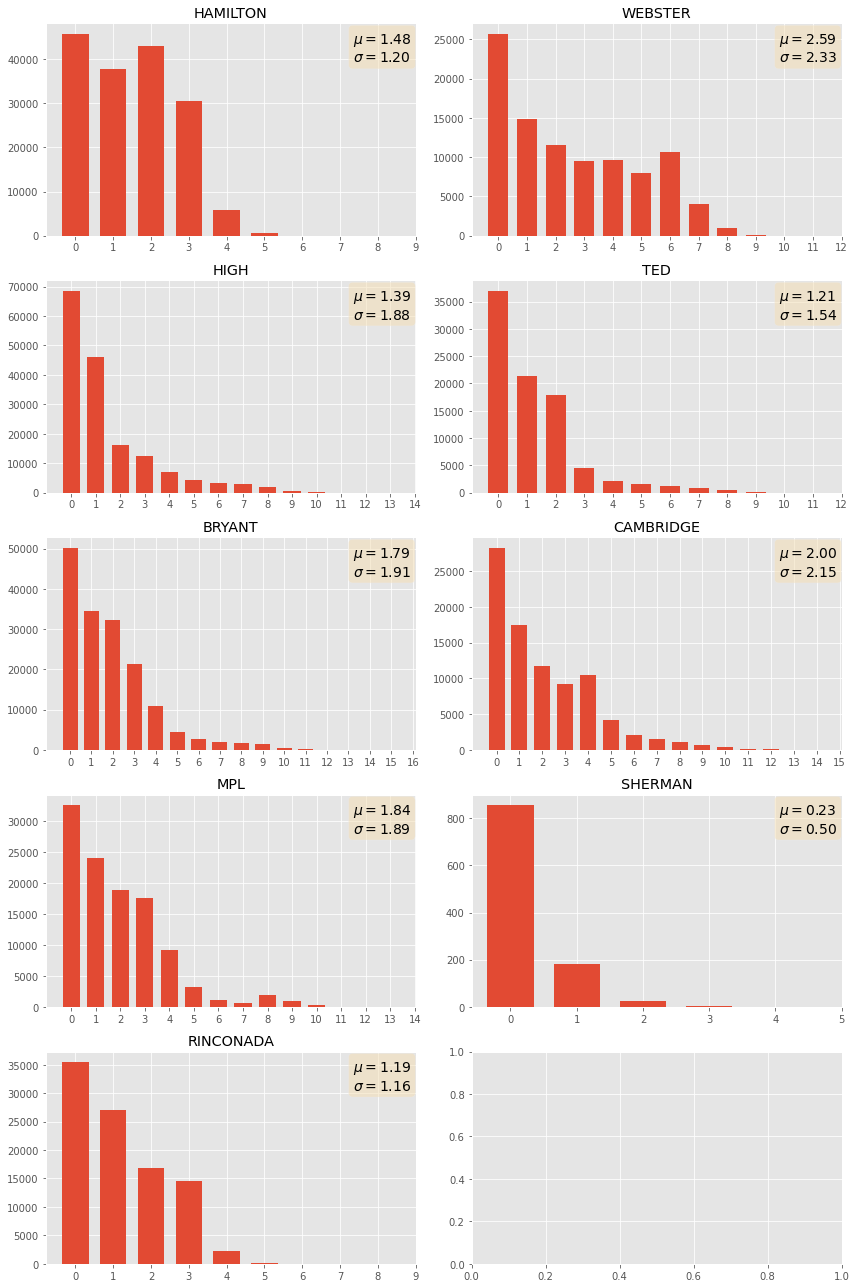

In [111]:
fig, axes = plt.subplots(5,2, figsize=(12, 18))
i = 0
j = 0
for key, value in hub_start_dict.items():
    cluster_events = df_event['Sessions'].loc[df_event['Cluster'] == key]
    cluster_mean = np.mean(df_event['Sessions'].loc[df_event['Cluster'] == key])
    cluster_sd = np.std(df_event['Sessions'].loc[df_event['Cluster'] == key])

    axes[i,j].hist(cluster_events, bins = range(np.max(cluster_events)+3), rwidth=0.7)
    axes[i,j].set_title(str(key))
    axes[i,j].plot()
    axes[i,j].set_xticks(np.arange(np.max(cluster_events)+3) + 0.5)
    axes[i,j].set_xticklabels(np.arange(np.max(cluster_events)+3))

    textstr = '\n'.join((
    r'$\mu=%.2f$' % (cluster_mean, ),
    r'$\sigma=%.2f$' % (cluster_sd, )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i,j].text(0.83, 0.962, textstr, transform=axes[i,j].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


    #axes[i,j].legend(([], []), (str(cluster_mean), str(cluster_sd)), loc='upper right', shadow=True)

    i += 1
    if i == 5:
        j += 1
        i = 0
fig.tight_layout() 


In [ ]:
### Could attempt to find best fitted pdf to above distributions

## Daily and weekly patterns 
#### Using quantile plots to explore patterns across clusters

In [149]:
df_event['Period']

0        2011-07-29 20:00:00
1        2011-07-29 20:30:00
2        2011-07-29 21:00:00
3        2011-07-29 21:30:00
4        2011-07-29 22:00:00
                 ...        
965610   2020-12-31 17:30:00
965611   2020-12-31 18:00:00
965612   2020-12-31 18:30:00
965613   2020-12-31 19:00:00
965614   2020-12-31 19:30:00
Name: Period, Length: 965615, dtype: datetime64[ns]

In [120]:
df_event['Day'] = df_event['Period'].dt.dayofweek
df_event['Hour'] = df_event['Period'].dt.hour


In [141]:
t = np.linspace(0,100,100)
y = 5 * np.sin(t/10) + 4*np.random.randn(100*150).reshape(150, 100)
y_ = 5 * np.sin(t/10) + 4*np.random.randn(100*4000).reshape(4000, 100)

t__ = np.linspace(0,100,6) 
y__ = 5 * np.sin(t__/10) + 4*np.random.randn(6*4000).reshape(4000, 6)

In [128]:
def tsplot(x, y, n=20, percentile_min=1, percentile_max=99, color='r', plot_mean=True, plot_median=False, line_color='k', **kwargs):
    # calculate the lower and upper percentile groups, skipping 50 percentile
    perc1 = np.percentile(y, np.linspace(percentile_min, 50, num=n, endpoint=False), axis=0)
    perc2 = np.percentile(y, np.linspace(50, percentile_max, num=n+1)[1:], axis=0)

    if 'alpha' in kwargs:
        alpha = kwargs.pop('alpha')
    else:
        alpha = 1/n
    # fill lower and upper percentile groups
    for p1, p2 in zip(perc1, perc2):
        plt.fill_between(x, p1, p2, alpha=alpha, color=color, edgecolor=None)


    if plot_mean:
        plt.plot(x, np.mean(y, axis=0), color=line_color)


    if plot_median:
        plt.plot(x, np.median(y, axis=0), color=line_color)
    
    return plt.gca()

<AxesSubplot:>

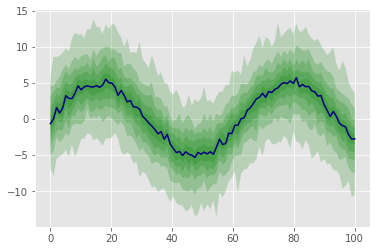

In [132]:
tsplot(t, y, n=5, percentile_min=2.5, percentile_max=97.5, plot_median=True, plot_mean=False, color='g', line_color='navy')

In [142]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [147]:
df_event[df_event['Cluster'] == 'HAMILTON'].groupby('Hour').agg([percentile(10), percentile(50), percentile(90)])['Sessions']

/opt/miniconda3/lib/python3.9/site-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,percentile_10,percentile_50,percentile_90
Hour,,,
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,0.0,2.0
6,0.0,1.0,3.0
7,0.0,2.0,3.0
8,0.0,2.0,3.0
